In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
df1=pd.read_csv("DailyDelhiClimateTest.csv")
df1.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [7]:
df1.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
df2=pd.concat([df,df1],  join='outer',ignore_index=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB


In [10]:
df2["date"]=pd.to_datetime(df2['date'])

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1576 non-null   datetime64[ns]
 1   meantemp      1576 non-null   float64       
 2   humidity      1576 non-null   float64       
 3   wind_speed    1576 non-null   float64       
 4   meanpressure  1576 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 61.7 KB


In [12]:
dft=df2[["date","meantemp"]]
dft.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


skewness of meantemp -0.38


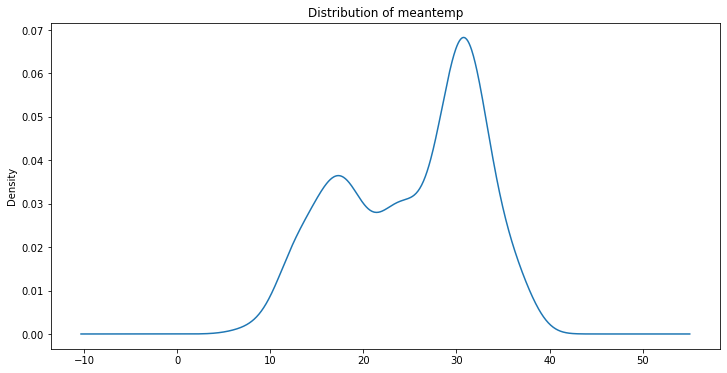

In [13]:
plt.figure(figsize=(12,6))
plt.title("Distribution of meantemp")
dft["meantemp"].plot(kind='kde')
print("skewness of meantemp {}".format(round(dft["meantemp"].skew(),2)))

In [14]:
import statsmodels.api as sm
from pylab import rcParams
from scipy.fftpack import fftfreq

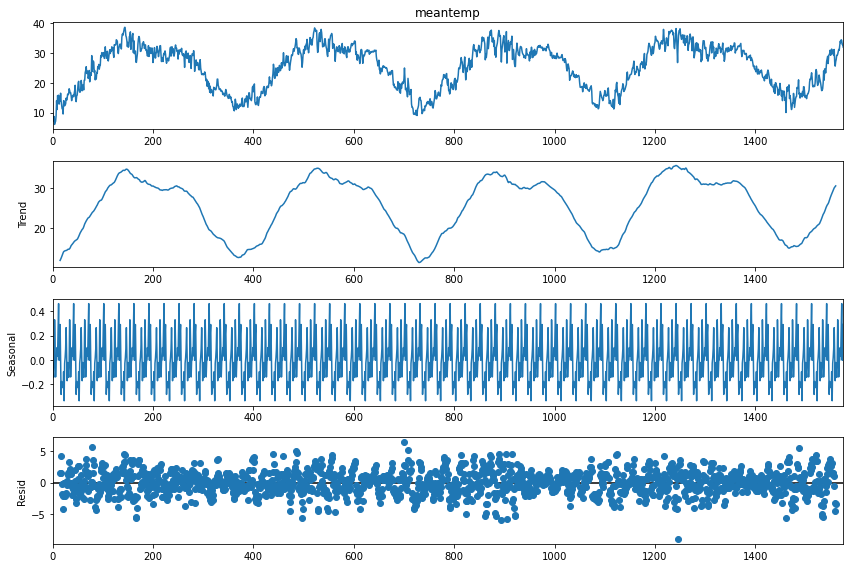

In [15]:
dec=sm.tsa.seasonal_decompose(dft["meantemp"],model="additive",period=30)
rcParams['figure.figsize']=12,8
fig=dec.plot()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
print("p-value from ADF test: {}".format(np.round(pd.Series(adfuller(dft["meantemp"]))[1],2)))

p-value from ADF test: 0.15


In [17]:
dft.set_index("date",inplace=True)

In [18]:
from scipy.stats import boxcox
data_bc=pd.Series(boxcox(dft["meantemp"],lmbda=0),index=dft.index)

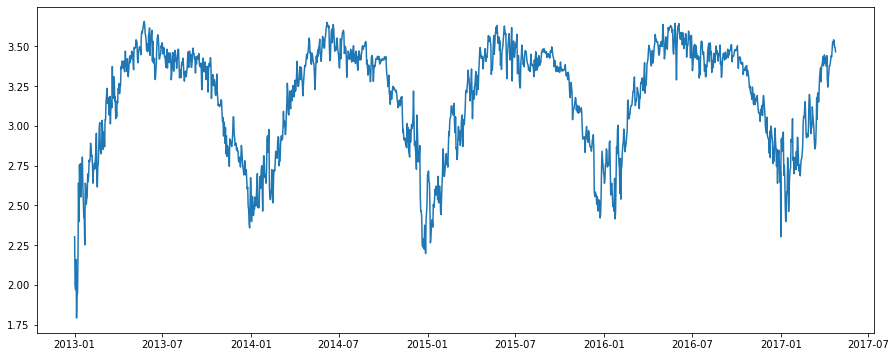

In [19]:
plt.figure(figsize=(15,6))
plt.plot(data_bc)
plt.show()

In [20]:
print("p-value of ADF test: {}".format(pd.Series(adfuller(data_bc))[1]))

p-value of ADF test: 0.0017473486939797369


In [21]:
from sklearn.model_selection import train_test_split

In [56]:
train,test=train_test_split(dft,train_size=0.8,shuffle=False)

In [23]:
import warnings
warnings.filterwarnings('ignore')

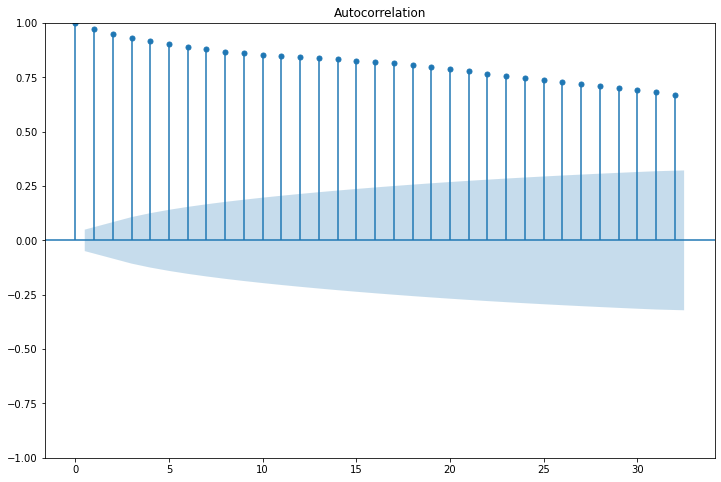

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_bc)
plt.show()

<Figure size 1080x432 with 0 Axes>

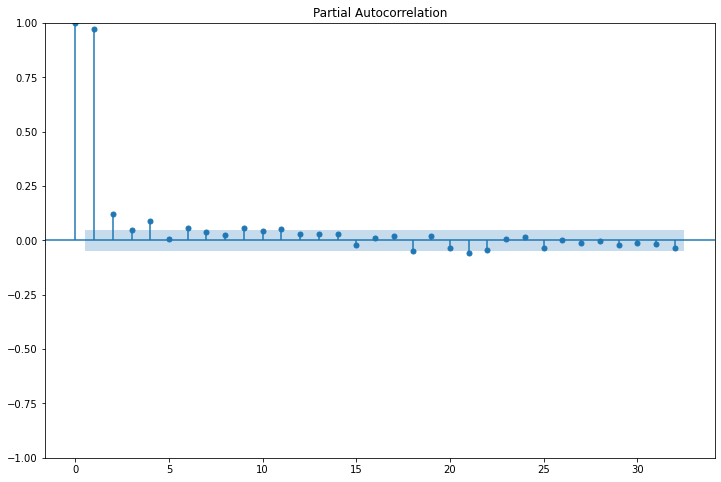

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(15,6))
plot_pacf(data_bc)
plt.show()

In [57]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data_bc,order=(32,1,21))
model_fit=model.fit()

In [58]:
y_hat_ar=data_bc.copy()

In [59]:
y_hat_ar["ar_fc"]=model_fit.predict(data_bc.index.min(),data_bc.index.max())
y_hat_ar["arima"]=np.exp(y_hat_ar["ar_fc"])

In [60]:
y_hat_ar["arima"]

date
2013-01-01     1.000000
2013-01-02    10.000000
2013-01-03     7.792493
2013-01-04     7.368346
2013-01-05     8.630429
                ...    
2017-04-20    33.020092
2017-04-21    34.251605
2017-04-22    33.979752
2017-04-23    32.683003
2017-04-24    32.984021
Name: predicted_mean, Length: 1576, dtype: float64

In [61]:
import sklearn.metrics as skm
print("MAPE: {}".format(skm.mean_absolute_percentage_error(test["meantemp"],y_hat_ar["arima"][test["meantemp"].index.min():])))

MAPE: 0.05259101274891041


In [62]:
print("MAPE: {}".format(np.round(np.mean(np.abs(test["meantemp"]-y_hat_ar["arima"][test.index.min():])/test["meantemp"])*100,2)))

MAPE: 5.26


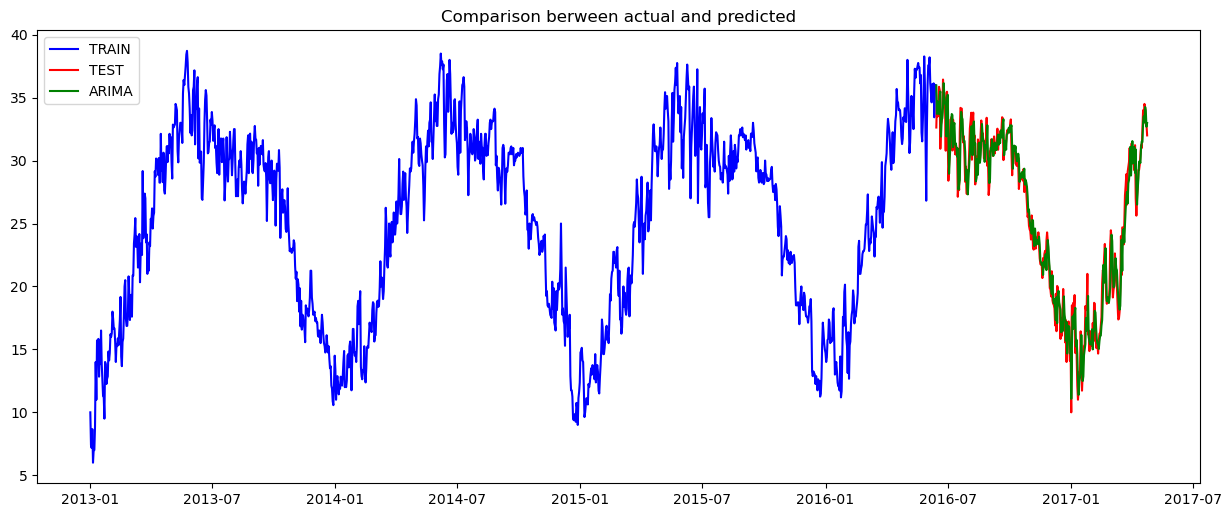

In [63]:
plt.figure(figsize=(15,6),dpi=100)
plt.title("Comparison berween actual and predicted")
plt.plot(train["meantemp"],label="TRAIN",color='b')
plt.plot(test["meantemp"],label="TEST",color='r')
plt.plot(y_hat_ar["arima"][test["meantemp"].index.min():],label="ARIMA",color='g')
plt.legend(loc='best')
plt.show()

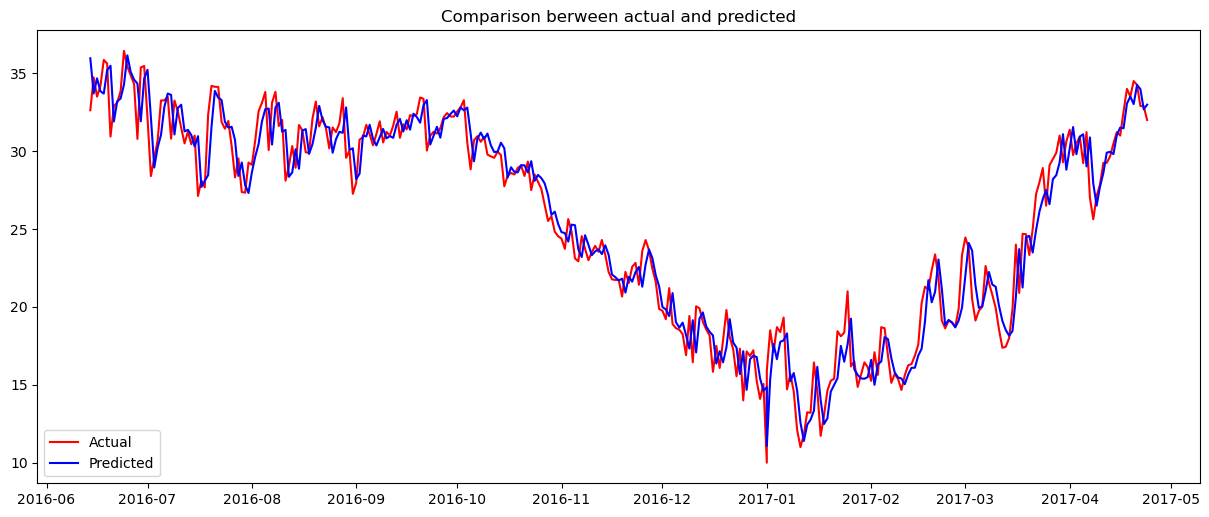

In [68]:
plt.figure(figsize=(15,6),dpi=100)
plt.title("Comparison berween actual and predicted")
plt.plot(test["meantemp"],label="Actual",color='r')
plt.plot(y_hat_ar["arima"][test["meantemp"].index.min():],label="Predicted",color='b')
plt.legend(loc='best')
plt.show()

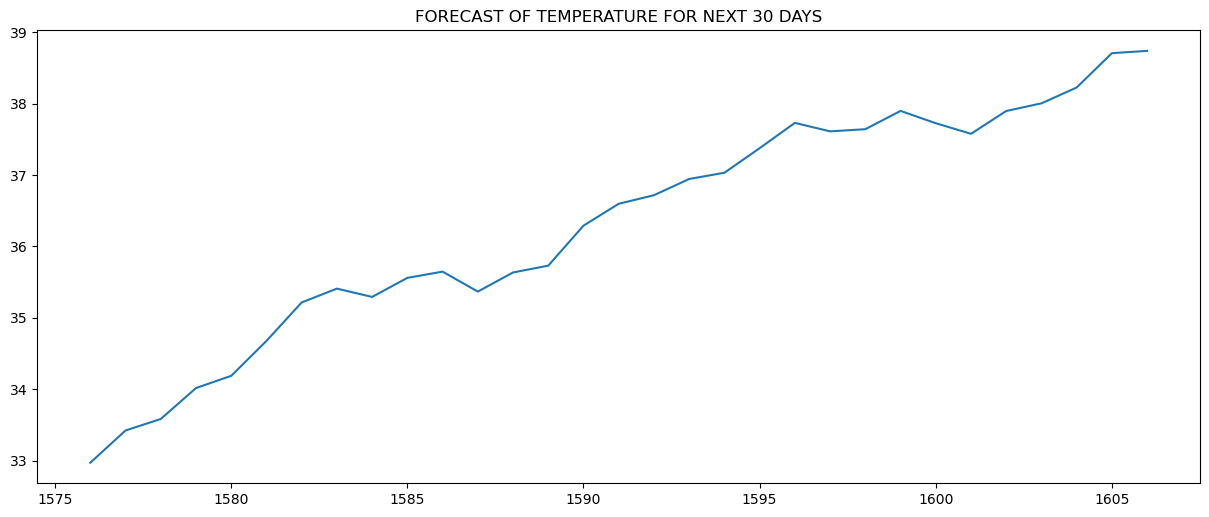

In [76]:
fp=model_fit.predict(start=len(dft),end=len(dft)+30)
plt.figure(figsize=(15,6),dpi=100)
plt.title("FORECAST OF TEMPERATURE FOR NEXT 30 DAYS")
fp=np.exp(fp)
fp.plot()
plt.show()